# Matplotlib 代码笔记本

# 一、基本介绍与操作

Duplicate key in file WindowsPath('e:/Programming/anaconda3/envs/bioinformatics/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 271 ('font.family:  sans-serif')
Duplicate key in file WindowsPath('e:/Programming/anaconda3/envs/bioinformatics/Lib/site-packages/matplotlib/mpl-data/matplotlibrc'), line 279 ('font.sans-serif: DejaVu Sans, Bitstream Vera Sans, Computer Modern Sans Serif, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif')


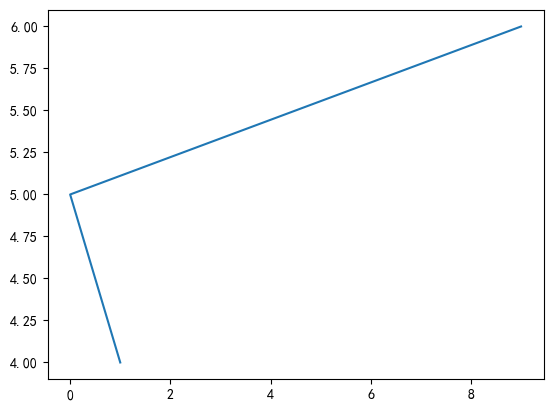

In [1]:
import matplotlib.pyplot as plt # 导入Matplotlib库
%matplotlib inline
# ↑用于在 Jupyter Notebook 中内嵌显示 Matplotlib 绘制的图表。使用这个命令后，可以省略 plt.show() 这一步，直接在 Notebook 中显示图像。

plt.figure() # 创建画布
plt.plot([1, 0, 9], [4, 5, 6]) # 绘制图像
plt.show() # 展示图像，用了matplotlib inline命令后可以省略

*↑描点连线图*

- 解决中文显示问题

In [2]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像时负号'-'显示为方块的问题

# 二、基础绘图功能

## 1. 绘图细节

- 修改大小、清晰度

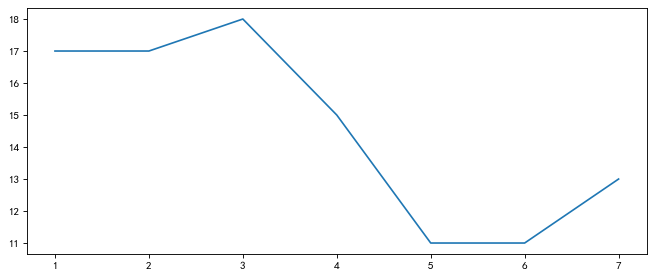

In [3]:
# 1. 创建画布
plt.figure(figsize=(10, 4), dpi=80) # figsize图像大小，dpi（dot per inch）图像清晰度

# 2. 绘制图像
plt.plot([1, 2, 3, 4, 5, 6, 7], [17, 17, 18, 15, 11, 11, 13])

# 保存图像
plt.savefig("my_plot.png")

# 3. 展示图像
plt.show()

- 需求：画出某城市11点到12点1小时内每分钟的温度变化折线图，温度范围在15度~18度

In [4]:
import random

x = range(60)
y_city = [random.uniform(15, 18) for i in x] # 随机生成指定的数据，random.uniform 均匀分布
y_city[:5]

[16.420549321187522,
 17.123098248683842,
 15.078077847852036,
 16.75071009493625,
 16.485251504023015]

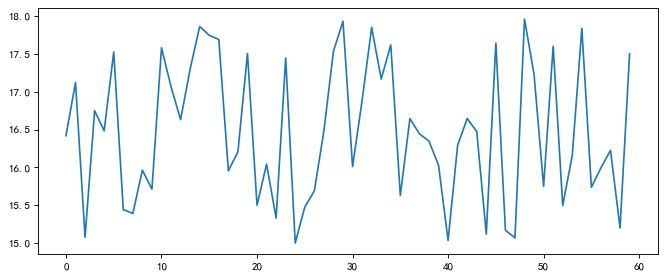

In [5]:
plt.figure(figsize=(10, 4), dpi=80)
plt.plot(x, y_city)
plt.show()

- 添加辅助显示层

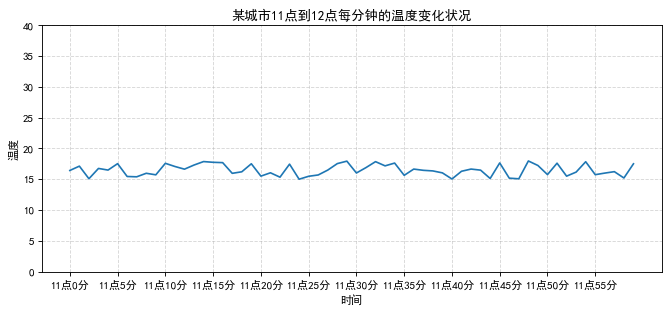

In [6]:
plt.figure(figsize=(10, 4), dpi=80)
plt.plot(x, y_city)

# 准备刻度：
x_label = ["11点{}分".format(i) for i in x]

# 修改x、y轴刻度
plt.xticks(x[::5], x_label[::5]) # 步长为5，注意x与x_label步长对应
plt.yticks(range(0, 41, 5)) # 注意range左闭右开区间

# 添加网格
plt.grid(linestyle="--", alpha=0.5)

# 添加坐标轴名称和标题
plt.xlabel("时间")
plt.ylabel("温度")
plt.title("某城市11点到12点每分钟的温度变化状况")

plt.show()

- 两个图在一起

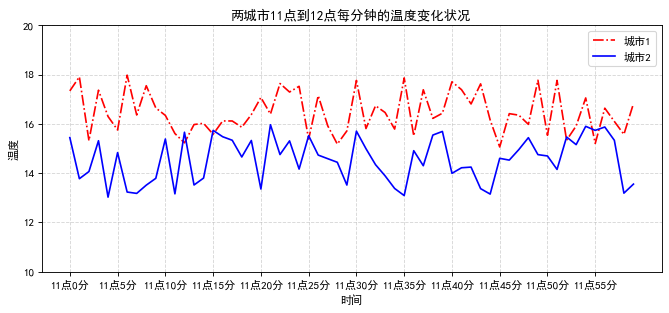

In [7]:
x = range(60)
y_city_1 = [random.uniform(15, 18) for i in x] # 随机生成指定的数据，random.uniform 均匀分布
y_city_2 = [random.uniform(13, 16) for i in x]

plt.figure(figsize=(10, 4), dpi=80)
plt.plot(x, y_city_1, color="r", linestyle="-.", label="城市1")
plt.plot(x, y_city_2, color="b", label="城市2")

# 显示图例
plt.legend(loc=1) # loc图例位置，默认0/1右上角

# 准备刻度：
x_label = ["11点{}分".format(i) for i in x]

# 修改x、y轴刻度
plt.xticks(x[::5], x_label[::5]) # 步长为5，注意x与x_label步长对应
plt.yticks(range(10, 21, 2)) # 注意range左闭右开区间

# 添加网格
plt.grid(linestyle="--", alpha=0.5) # linestyle线条风格，alpha透明度

# 添加坐标轴名称和标题
plt.xlabel("时间")
plt.ylabel("温度")
plt.title("两城市11点到12点每分钟的温度变化状况")

plt.show()

## 2. 多个绘图区

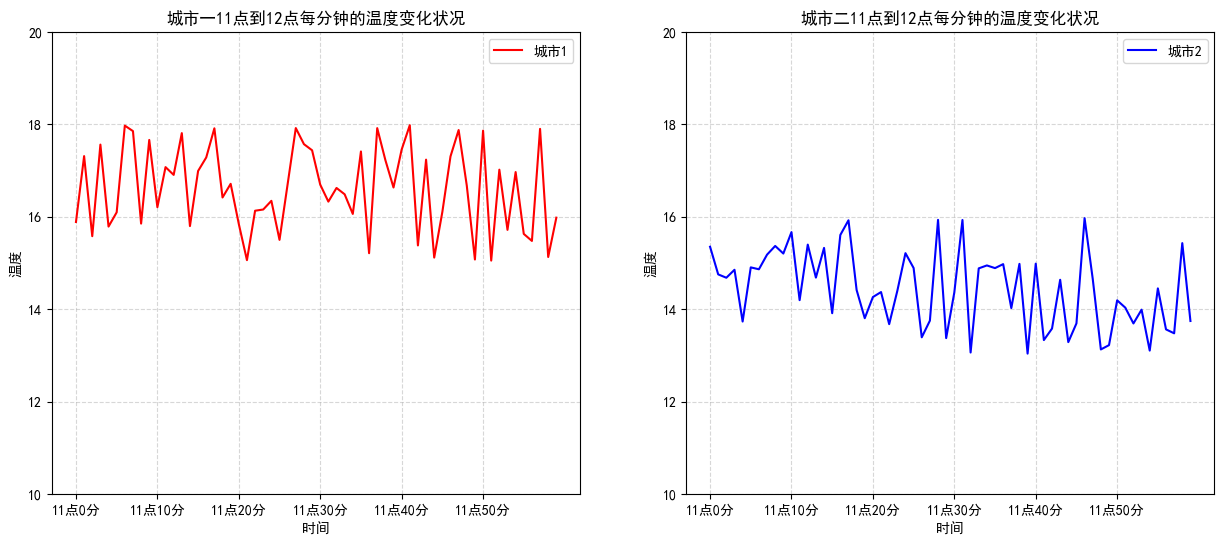

In [15]:
x = range(60)
y_city_1 = [random.uniform(15, 18) for i in x] # 随机生成指定的数据，random.uniform 均匀分布
y_city_2 = [random.uniform(13, 16) for i in x]

# 创建两个绘图区
figs, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6), dpi=100) # 几行几列的绘图区，注意输出

# 各自绘制图像
axes[0].plot(x, y_city_1, color="r", label="城市1")
axes[1].plot(x, y_city_2, color="b", label="城市2")

# 显示图例
axes[0].legend(loc=1) # loc图例位置，默认0/1右上角
axes[1].legend(loc=1)

# 准备刻度：
x_label = ["11点{}分".format(i) for i in x]

# 修改x、y轴刻度（注意用set_）
axes[0].set_xticks(x[::10], x_label[::10]) # 步长为5，注意x与x_label步长对应
axes[0].set_yticks(range(10, 21, 2)) # 注意range左闭右开区间
axes[1].set_xticks(x[::10], x_label[::10])
axes[1].set_yticks(range(10, 21, 2))

# 添加网格
axes[0].grid(linestyle="--", alpha=0.5) # linestyle线条风格，alpha透明度
axes[1].grid(linestyle="--", alpha=0.5)

# 添加坐标轴名称和标题
axes[0].set_xlabel("时间")
axes[0].set_ylabel("温度")
axes[0].set_title("城市一11点到12点每分钟的温度变化状况")

axes[1].set_xlabel("时间")
axes[1].set_ylabel("温度")
axes[1].set_title("城市二11点到12点每分钟的温度变化状况")

plt.show()

# 三、绘制各种图像

## 1. 折线图

- 最基本的：

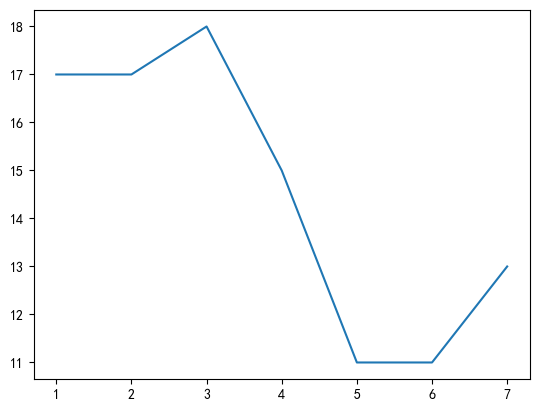

In [9]:
# 某地一周温度变化

# 1. 创建画布
plt.figure()

# 2. 绘制图像
plt.plot([1, 2, 3, 4, 5, 6, 7], [17, 17, 18, 15, 11, 11, 13])

# 3. 展示图像
plt.show()

- 画数学函数图像

In [10]:
import numpy as np

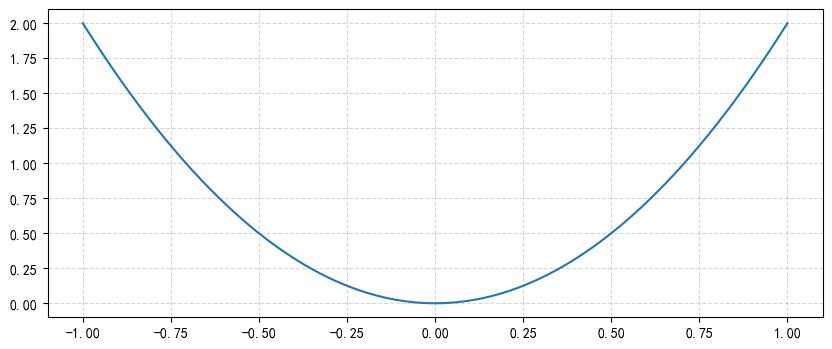

In [14]:
# 1、准备x，y数据
x = np.linspace(-1, 1, 1000) # -1~1的等距离的1000个数
y = 2 * x * x

# 2、创建画布
plt.figure(figsize=(10, 4), dpi=100)

# 3、绘制图像
plt.plot(x, y)

# 添加网格显示
plt.grid(linestyle="--", alpha=0.5)

# 4、显示图像
plt.show()

## 2. 散点图

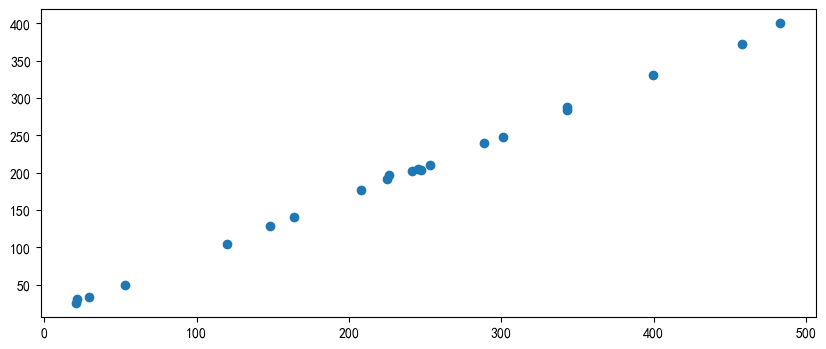

In [13]:
# 需求：探究房屋面积和房屋价格的关系

# 1、准备数据
area = [225.98, 247.07, 253.14, 457.85, 241.58, 301.01,  20.67, 288.64,
       163.56, 120.06, 207.83, 342.75, 147.9 ,  53.06, 224.72,  29.51,
        21.61, 483.21, 245.25, 399.25, 343.35]

price = [196.63, 203.88, 210.75, 372.74, 202.41, 247.61,  24.9 , 239.34,
       140.32, 104.15, 176.84, 288.23, 128.79,  49.64, 191.74,  33.1 ,
        30.74, 400.02, 205.35, 330.64, 283.45]

plt.figure(figsize=(10, 4), dpi=100)

plt.scatter(area, price)

plt.show()

## 3. 柱状图

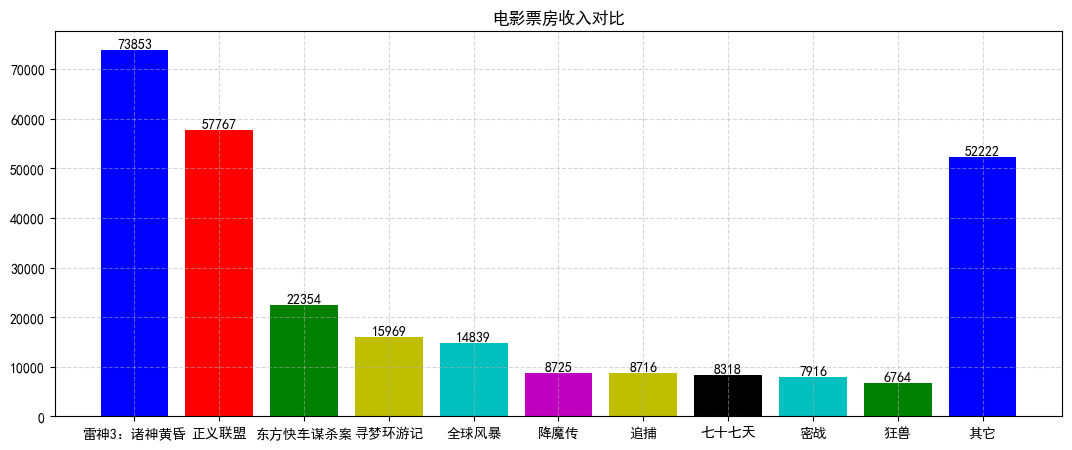

In [ ]:
# 需求1-对比每部电影的票房收入
# 准备数据
movie_names = ['雷神3：诸神黄昏','正义联盟','东方快车谋杀案','寻梦环游记','全球风暴', '降魔传','追捕','七十七天','密战','狂兽','其它']
tickets = [73853,57767,22354,15969,14839,8725,8716,8318,7916,6764,52222]
colors = ['b','r','g','y','c','m','y','k','c','g','b']

plt.figure(figsize=(13, 5), dpi=100)

bars = plt.bar(movie_names, tickets, color=colors)
# plt.bar(range(len(movie_names)), tickets)

# 添加标题
plt.title("电影票房收入对比")

# 添加网格显示
plt.grid(linestyle="--", alpha=0.5)

# 每根柱子上添加数值
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, # bar.get_width()/2.的 . 表示浮点除法，不是整除法
             f'{height}',
             ha='center', va='bottom')

plt.show()

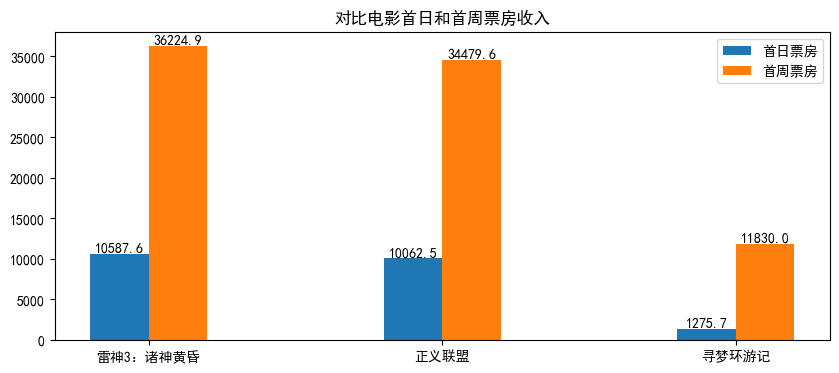

In [41]:
# 需求2-对比电影首日和首周票房收入（更能加有说服力）

movie_name = ['雷神3：诸神黄昏','正义联盟','寻梦环游记']

first_day = [10587.6,10062.5,1275.7]
first_weekend=[36224.9,34479.6,11830]

plt.figure(figsize=(10, 4), dpi=100)

width = 0.2
bar1 = plt.bar(range(len(movie_name)), first_day, width=0.2, label="首日票房")
bar2 = plt.bar([i + width for i in range(len(movie_name))], first_weekend, width=width, label="首周票房") # 注意两个柱子错开：i + width

# 修改刻度
plt.xticks([i + width/2. for i in range(len(movie_name))], movie_name) # 注意字在中间：i + width/2.

# 每根柱子上添加数值
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height, # bar.get_width()/2.的 . 表示浮点除法，不是整除法
                f'{height}',
               ha='center', va='bottom')

# 添加图例
plt.legend()

# 添加标题
plt.title("对比电影首日和首周票房收入")

plt.show()

## 4. 直方图

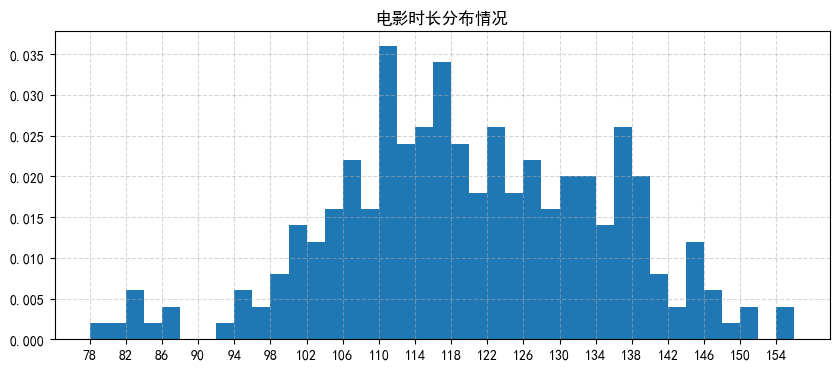

In [ ]:
# 需求：电影时长分布情况
# 准备数据
time = [131,  98, 125, 131, 124, 139, 131, 117, 128, 108, 135, 138, 131, 102, 107, 114, 119, 128, 121, 142, 127, 130, 124, 101, 110, 116, 117, 110, 128, 128, 115,  99, 136, 126, 134,  95, 138, 117, 111,78, 132, 124, 113, 150, 110, 117,  86,  95, 144, 105, 126, 130,126, 130, 126, 116, 123, 106, 112, 138, 123,  86, 101,  99, 136,123, 117, 119, 105, 137, 123, 128, 125, 104, 109, 134, 125, 127,105, 120, 107, 129, 116, 108, 132, 103, 136, 118, 102, 120, 114,105, 115, 132, 145, 119, 121, 112, 139, 125, 138, 109, 132, 134,156, 106, 117, 127, 144, 139, 139, 119, 140,  83, 110, 102,123,107, 143, 115, 136, 118, 139, 123, 112, 118, 125, 109, 119, 133,112, 114, 122, 109, 106, 123, 116, 131, 127, 115, 118, 112, 135,115, 146, 137, 116, 103, 144,  83, 123, 111, 110, 111, 100, 154,136, 100, 118, 119, 133, 134, 106, 129, 126, 110, 111, 109, 141,120, 117, 106, 149, 122, 122, 110, 118, 127, 121, 114, 125, 126,114, 140, 103, 130, 141, 117, 106, 114, 121, 114, 133, 137,  92,121, 112, 146,  97, 137, 105,  98, 117, 112,  81,  97, 139, 113,134, 106, 144, 110, 137, 137, 111, 104, 117, 100, 111, 101, 110,105, 129, 137, 112, 120, 113, 133, 112,  83,  94, 146, 133, 101,131, 116, 111,  84, 137, 115, 122, 106, 144, 109, 123, 116, 111,111, 133, 150]

plt.figure(figsize=(10, 4), dpi=100)

distance = 2 # 原始组距2
group_num = int((max(time) - min(time)) / distance) # 计算组数

plt.hist(time, bins=group_num, density=True) # density=True表示频率，默认False频数

# 修改x轴刻度
plt.xticks(range(min(time), max(time) + 2, distance*2)) # 步长设置为原始组距*2

# 添加网格
plt.grid(linestyle="--", alpha=0.5)

# 添加标题
plt.title("电影时长分布情况")

plt.show()

## 5. 饼图

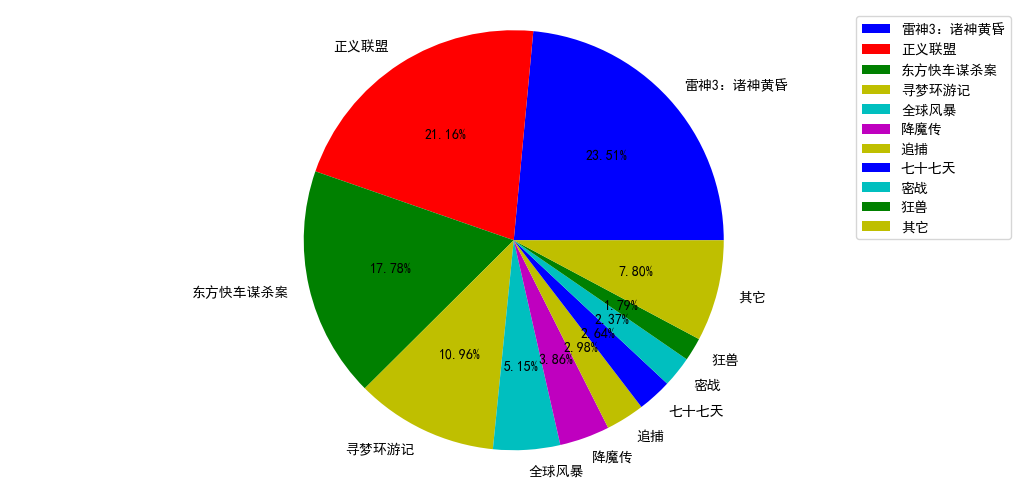

In [ ]:
# 准备数据
movie_name = ['雷神3：诸神黄昏','正义联盟','东方快车谋杀案','寻梦环游记','全球风暴','降魔传','追捕','七十七天','密战','狂兽','其它']

place_count = [60605,54546,45819,28243,13270,9945,7679,6799,6101,4621,20105]

plt.figure(figsize=(13, 6), dpi=100)

# 3、绘制饼图
plt.pie(place_count, labels=movie_name, colors=['b','r','g','y','c','m','y','b','c','g','y'], autopct="%1.2f%%")
# autopct注释：
# %：表示格式化的开始。
# 1：表示最小宽度为1。如果数字位数不足，会用空格填充。
# 2：表示小数点后保留2位。
# f：表示浮点数类型。
# %%：表示输出一个百分号 %

# 显示图例
plt.legend()

plt.axis('equal') # 保持横纵轴比例，保持正圆

plt.show()

*类别太多（超过9个），数字看不清，建议用柱状图*